In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='Age', ylabel='count'>

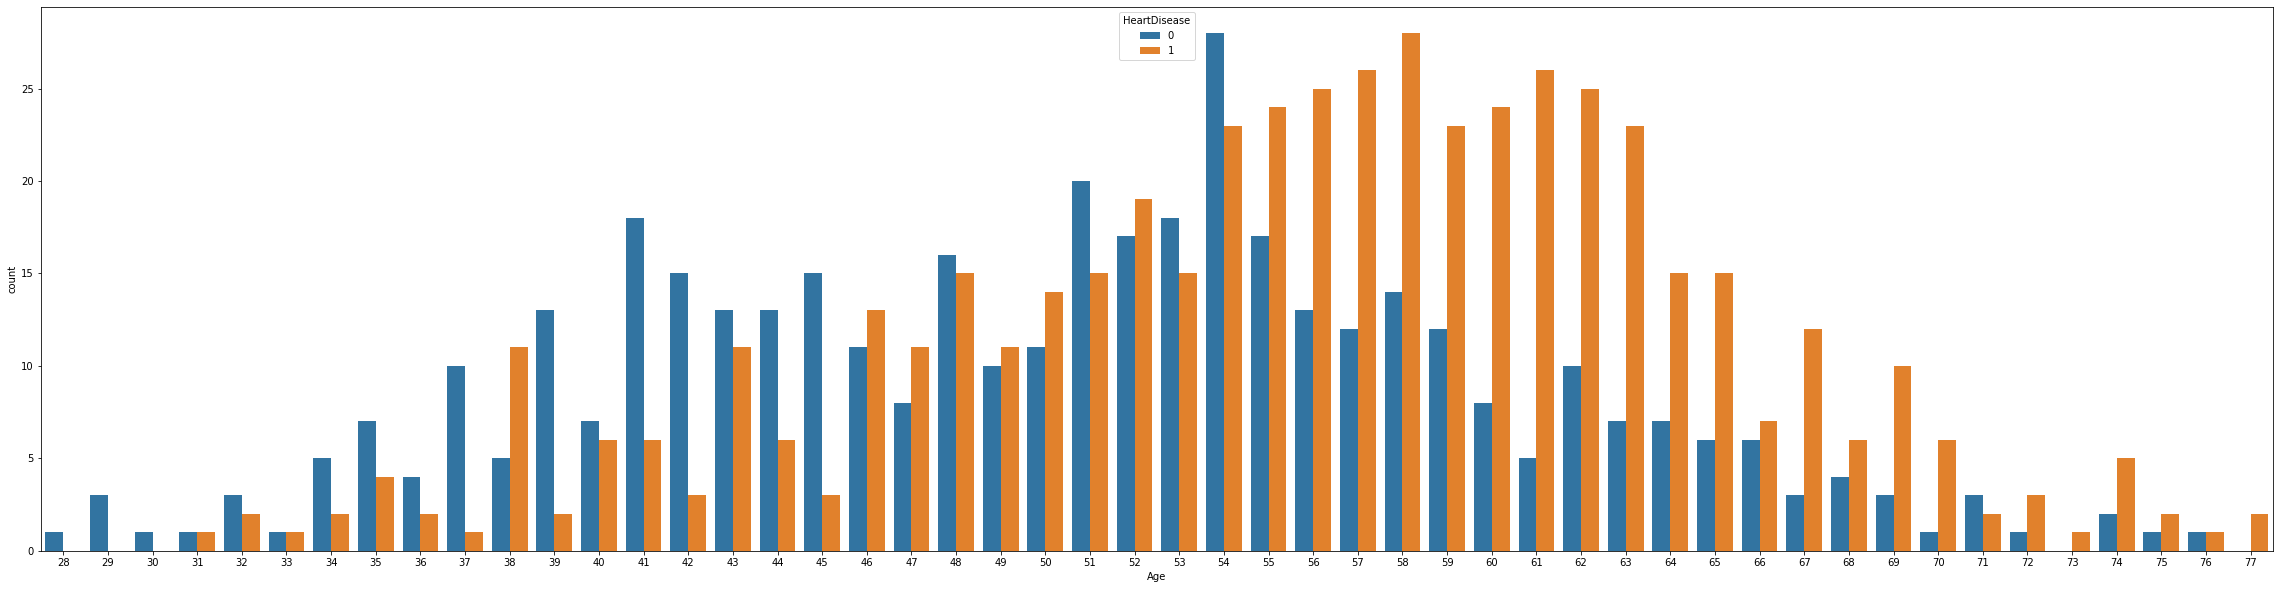

In [12]:
# data visualisations
plt.figure(figsize = (40, 10))
sns.countplot(data=data, x='Age', hue = 'HeartDisease')

<AxesSubplot:xlabel='Sex', ylabel='count'>

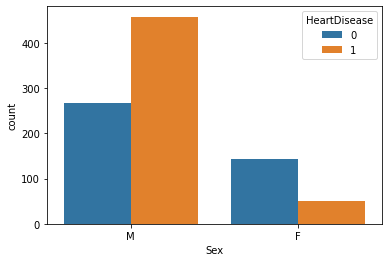

In [13]:
sns.countplot(data = data, x = 'Sex', hue = 'HeartDisease')

In [18]:
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data_dummy = pd.get_dummies(data = data, columns = columns_to_encode, drop_first = True)

In [19]:
data_dummy.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


<AxesSubplot:>

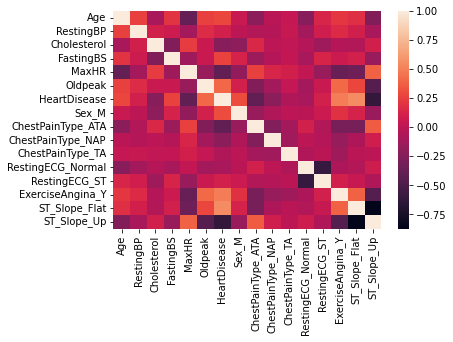

In [20]:
sns.heatmap(data = data_dummy.corr())

In [37]:
x = data_dummy.to_numpy()
print(len(y))

918


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
        -1.00218103,  1.15067399]])

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [54]:
print(len(y_train))

642


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = KNeighborsClassifier(n_neighbors= 14)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=14)

In [87]:
pred = classifier.predict(x_test)

In [88]:
confusion_matrix(y_test, pred)
print(accuracy_score(y_test, pred))

0.6739130434782609


In [100]:
error_count = []
for i in range(1, 40):
    clas = KNeighborsClassifier(n_neighbors = i)
    clas.fit(x_train, y_train)
    pred_i = clas.predict(x_test)
    del_y = (y_test-pred)**(2)
    error_count.append(np.mean(pred_i != y_test))


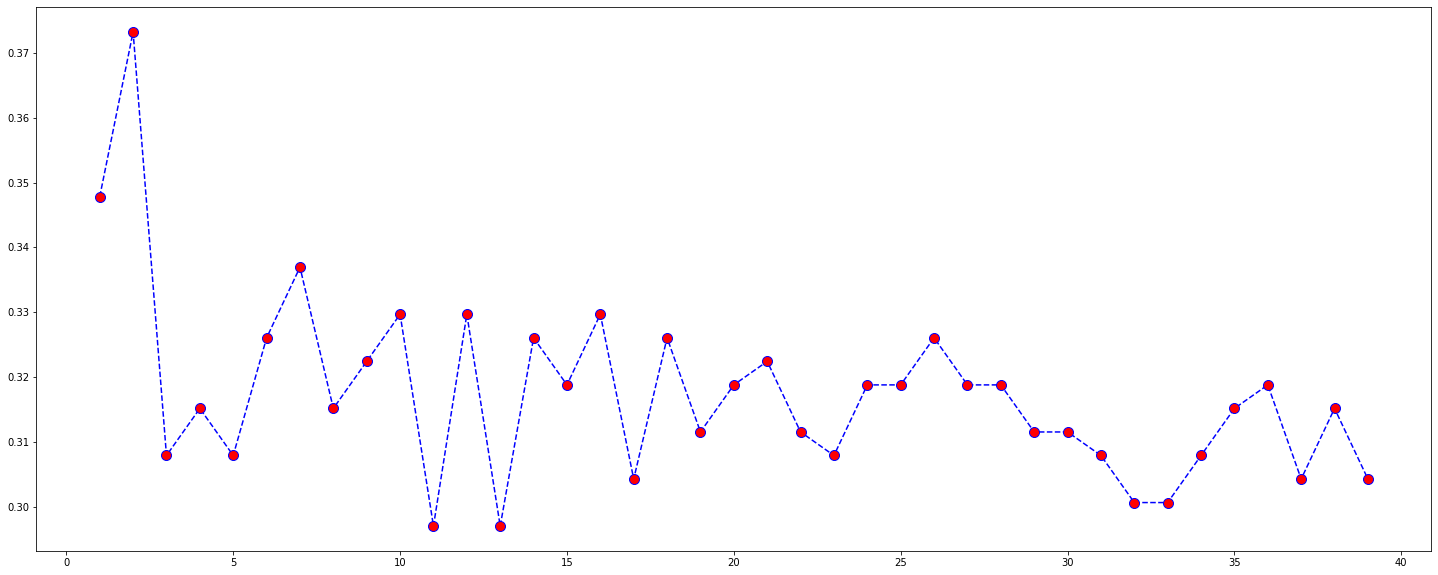

In [102]:
plt.figure(figsize= (25, 10))
plt.plot(range(1, 40), error_count, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [97]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [104]:
print(error_count[10])

0.2971014492753623


In [98]:
confusion_matrix(y_test, y_pred)

array([[ 81,  45],
       [ 37, 113]], dtype=int64)

In [99]:
accuracy_score(y_test, y_pred)

0.7028985507246377

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred_tree = dtree.predict(x_test)
confusion_matrix(y_test,pred_tree)


array([[103,  23],
       [ 29, 121]], dtype=int64)

In [111]:
accuracy_score(y_test, pred_tree)

0.8115942028985508

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)
pred_ran = rfc.predict(x_test)


In [114]:
confusion_matrix(y_test, pred_ran)

array([[104,  22],
       [ 19, 131]], dtype=int64)

In [115]:
accuracy_score(y_test, pred_ran)

0.8514492753623188